In [1]:
import pickle
results = []
final_inds = False
if final_inds:
    inds = [1803,1903,630]
    mystr = '_final_'
else:
    inds = [1623, 1698, 202,79]
    mystr =''
    
for i, ind in enumerate(inds):
    with open('data/calibrated_' + mystr + str(i) + '_epoch_' + str(ind) + '.pickle', 'rb') as handle:
        results.append(pickle.load(handle))


2 212
(212, 2)
1.21865559764e-40 -2.89942727826e-52


In [11]:
my_nn = results[1]['function']
my_nn.dims

from policy import SimplePolicy2
from collections import namedtuple
from game_agent_comp import CustomPlayerComp
from value_functions import improved_score_fast_x2
from tournament import tournament

Agent = namedtuple("Agent", ["player", "name"])

nn_policy = SimplePolicy2(6, my_nn)
CUSTOM_ARGS = {"method": 'alphabeta', 'iterative': True}
my_nn_agent = Agent(CustomPlayerComp(score_fn=improved_score_fast_x2,
                                            policy = nn_policy, **CUSTOM_ARGS),
                      "first NN policy")

result = tournament(num_matches =5, test_agents = [my_nn_agent] )

49
49
49
49
49
49
49
49

This script evaluates the performance of the custom heuristic function by
comparing the strength of an agent using iterative deepening (ID) search with
alpha-beta pruning against the strength rating of agents using other heuristic
functions.  The `ID_Improved` agent provides a baseline by measuring the
performance of a basic agent using Iterative Deepening and the "improved"
heuristic (from lecture) on your hardware.  The `Student` agent then measures
the performance of Iterative Deepening and the custom heuristic against the
same opponents.


*************************
Evaluating: first NN policy
*************************

Playing Matches:
----------
  Match 1: first NN policy vs   Random    timeout!
timeout!


C:\Users\Egor\Dropbox\GitHub\aind\aind-isolation\tournament.py:106: UserWarning: One or more agents lost a match this round due to timeout. The get_move() function must return before time_left() reaches 0 ms. You will need to leave some time for the function to return, and may need to increase this margin to avoid timeouts during  tournament play.
  warnings.warn(TIMEOUT_WARNING)


timeout!
timeout!
timeout!
timeout!
	Result: 13 to 7
  Match 2: first NN policy vs   MM_Null   	Result: 17 to 3
  Match 3: first NN policy vs   MM_Open   	Result: 16 to 4
  Match 4: first NN policy vs MM_Improved 	Result: 19 to 1
  Match 5: first NN policy vs   AB_Null   	Result: 16 to 4
  Match 6: first NN policy vs   AB_Open   timeout!
timeout!
	Result: 13 to 7
  Match 7: first NN policy vs AB_Improved 	Result: 15 to 5


Results:
----------
first NN policy     77.86%


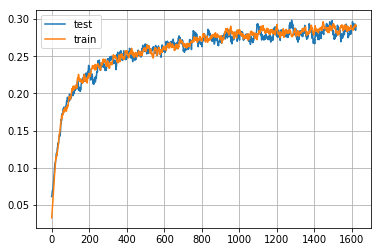

[3, 5, 1]


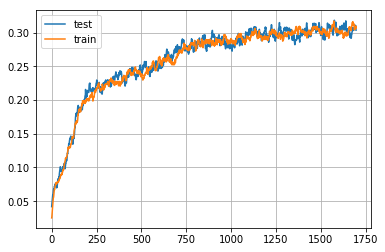

[3, 2, 2, 2, 1]


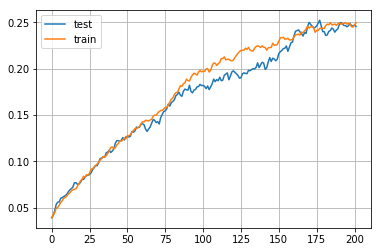

[3, 5, 5, 5, 5, 5, 1]


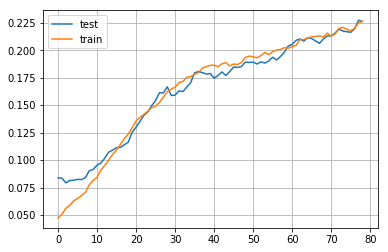

[3, 8, 8, 8, 8, 1]


In [3]:
def expsmooth(xvec, alpha):
    sm = []
    sm.append(xvec[0])
    for x in xvec[1:]:
        sm.append((1-alpha)*sm[-1]+alpha* x)
    return sm

import matplotlib.pyplot as plt
%matplotlib inline
for result in results:
    plt.figure()
    plt.plot(range(len(result['testerr'])), expsmooth(result['testerr'],0.1))
    plt.plot(range(len(result['trainerr'])),expsmooth(result['trainerr'],0.1))

    plt.legend(['test','train'])
    plt.grid()
    plt.show()
    print(result['function'].dims)